### Harmeet Singh | IIT Kharagpur
#### Logistic regression implementation

In [196]:
import numpy as np
import matplotlib.pyplot as plt

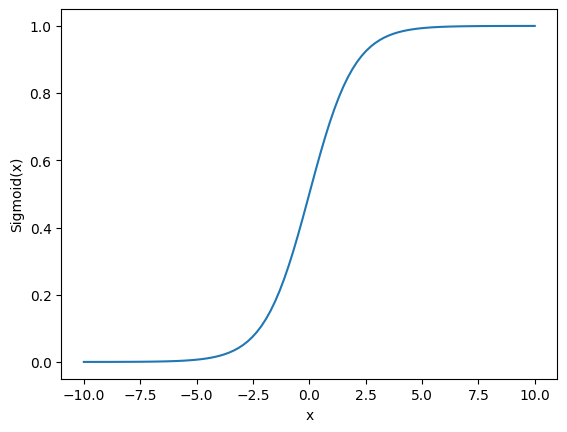

In [197]:
# SIGMOID FUNCTION

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# VISUALIZE SIGMOID FUNCTION CONSIDERING x IN THE RANGE(-10,10)

x_val = np.linspace(-10, 10, 100)
y_val = sigmoid(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.show()

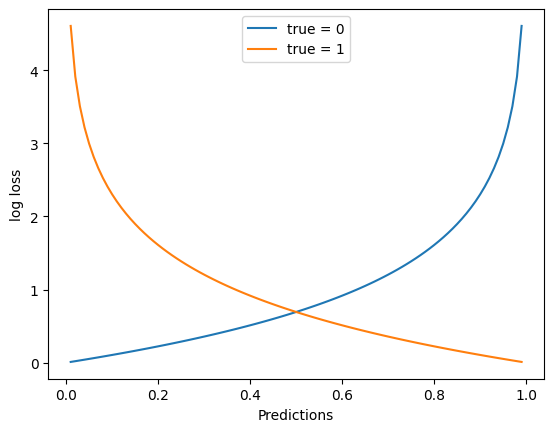

In [198]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss

# predictions as 0 to 1 in 0.01 increments
y_hat = np.arange(0.01, 1, 0.01)

# evaluate predictions for a 0 true value
logloss_0 = - np.log(1 - y_hat)

# evaluate predictions for a 1 true value
logloss_1 = - np.log( y_hat)

# plot input to loss
plt.plot(y_hat, logloss_0, label = 'true = 0')
plt.plot(y_hat, logloss_1, label = 'true = 1')

plt.xlabel('Predictions')
plt.ylabel('log loss')
plt.legend()

plt.show()




In [199]:
# DIFFERNECE BW MINIMUM LOG LOSS FOR LABEL 0 AND 1

ans = np.min(logloss_0) - np.min(logloss_1)
type(ans)

numpy.float64

In [200]:
#Import the dataset of iris from datasets.load_iris()
# Using sns to load the iris dataset, you'll get a pandas dataframe as output

from sklearn.datasets import load_iris

dataset = load_iris()

df = pd.DataFrame(dataset['data'])
df['target'] = dataset['target']

df.head()


,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


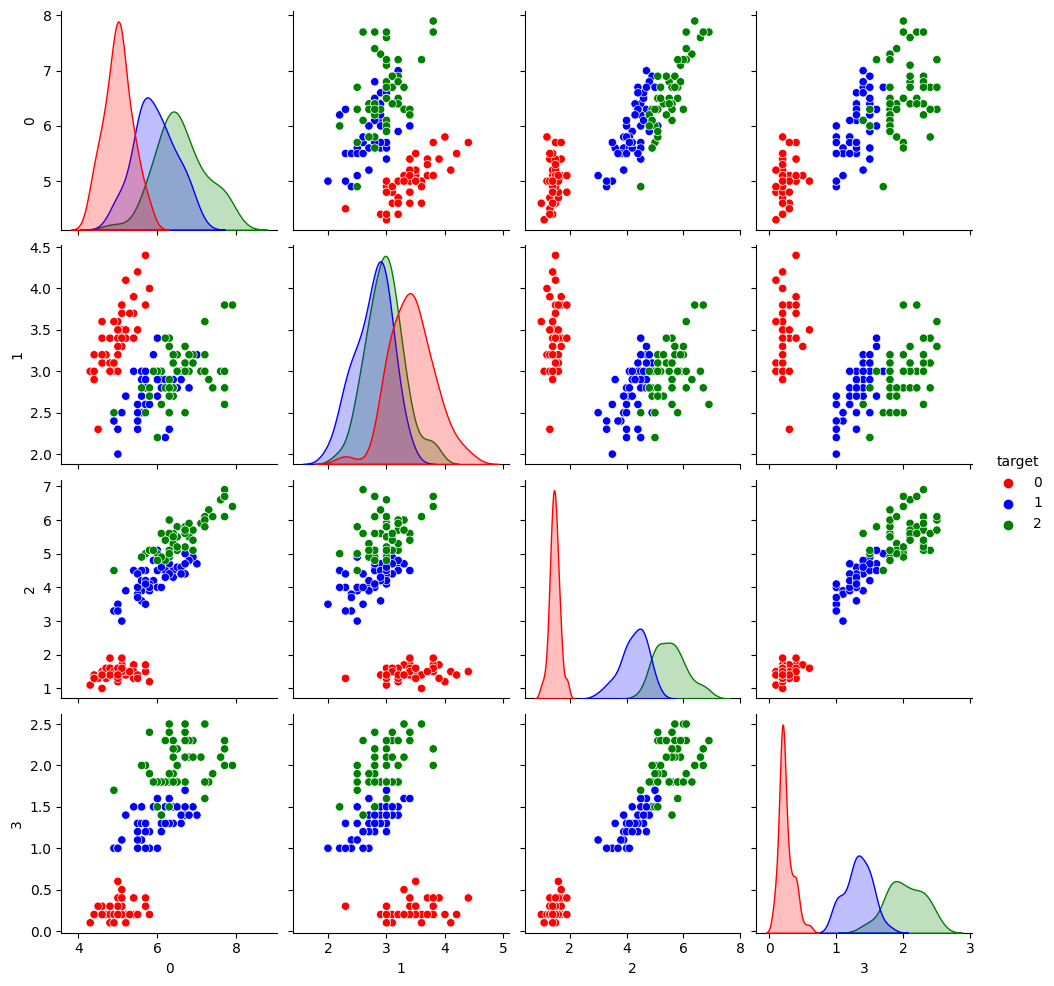

In [201]:
# VISUALIZE THE RELATIONSHIP WITH EACH OTHER

import seaborn as sns
sns.pairplot(df,hue='target', palette = ['red', 'blue', 'green'])

In [202]:
# WE'LL TRAIN USE THE LOGISTIC REGRESSION FOR LABEL = 1 AND 0
df = df[df.target < 2]
df.head()


,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [203]:
# MEAN OF THE SEPAL_LENGTH OF THE SPECIES "SETOSA" ADN "VERSICOLOR"
a = df.groupby('target').mean()[0]
print(a)

print(a[1] - a[0])

target
0    5.006
1    5.936
Name: 0, dtype: float64
0.9299999999999997


In [215]:
# OBTAIN THE WEIGHT VALUES
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

# SPLIT THE DATA INTO X AND Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# TRAINING THE MODEL 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# FINDING THE COEFFICIENTS AND INTERCETPS
print('coeff:', model.coef_)
print('intercept:',  model.intercept_)

coeff: [[ 0.44970541 -0.81916832  2.15293459  0.90745175]]
intercept: [-6.33969108]


In [218]:
# PREDICTING ON OUR TEST DATA
predictions = model.predict(x_test)

# FINDING THE ACCURACY
accuracy = np.mean(predictions == y_test)
accuracy

1.0

In [232]:

p = model.predict((np.array([1, 2, 3, 4])).reshape(1, -1)).item()
p


1